In [1]:
import polars as pl
import rdkit.Chem as Chem

In [2]:
# Read test data using polars
data_path = "../data/raw/test.parquet"
data = pl.read_parquet(data_path)

In [3]:
data.head()

id,buildingblock1_smiles,buildingblock2_smiles,buildingblock3_smiles,molecule_smiles,protein_name
i64,str,str,str,str,str
295246830,"""C#CCCC[C@H](NC(=O)OCC1c2ccccc2…","""C=Cc1ccc(N)cc1""","""C=Cc1ccc(N)cc1""","""C#CCCC[C@H](Nc1nc(Nc2ccc(C=C)c…","""BRD4"""
295246831,"""C#CCCC[C@H](NC(=O)OCC1c2ccccc2…","""C=Cc1ccc(N)cc1""","""C=Cc1ccc(N)cc1""","""C#CCCC[C@H](Nc1nc(Nc2ccc(C=C)c…","""HSA"""
295246832,"""C#CCCC[C@H](NC(=O)OCC1c2ccccc2…","""C=Cc1ccc(N)cc1""","""C=Cc1ccc(N)cc1""","""C#CCCC[C@H](Nc1nc(Nc2ccc(C=C)c…","""sEH"""
295246833,"""C#CCCC[C@H](NC(=O)OCC1c2ccccc2…","""C=Cc1ccc(N)cc1""","""CC(O)Cn1cnc2c(N)ncnc21""","""C#CCCC[C@H](Nc1nc(Nc2ccc(C=C)c…","""BRD4"""
295246834,"""C#CCCC[C@H](NC(=O)OCC1c2ccccc2…","""C=Cc1ccc(N)cc1""","""CC(O)Cn1cnc2c(N)ncnc21""","""C#CCCC[C@H](Nc1nc(Nc2ccc(C=C)c…","""HSA"""


In [5]:
data = data.to_pandas()

In [37]:
# Take rows with unique values in buildingblock1_smiles
unique_buildingblock1 = data.drop_duplicates(subset=["buildingblock1_smiles"])

# To create a product from the building blocks
Train set
1. FMOC reacts with triazine core
2. NH2 or NH groups react with triazine core

Test set
1. Boronate on bb reacts with Halide
2. COOH on bb reacts with FMOC
3. DNA reacts with NH

In [40]:
FMOC_TRIAZINE_SMART = '[#6]1:[#6]:[#7]:[#6]:[#7]:[#6]:1'
NH2_TRIAZINE_SMART = '[#6]1:[#6]:[#7]:[#6]:[#7]:[#7]:1'

BORONATE_HALIDE_SMART = '[#5](:[Cl]):[Cl]'
COOH_FMOC_SMART = '[#6]1:[#6]:[#6]:[#6]:[#6]:[#6]:1.[#6]1:[#6]:[#6]:[#6]:[#6]:[#6]:1'

DNA_COOH_SMART = '[#6]1:[#6]:[#6]:[#6]:[#6]:[#6]:1.[#6]1:[#6]:[#6]:[#6]:[#6]:[#6]:1' # Always on the first bb

/home/jmvanselm/Projects/q4-detect-medicine/venv/lib/python3.11/site-packages/rdkit/Chem/Draw/IPythonConsole.py:261: UserWarning: Truncating the list of molecules to be displayed to 500. Change the maxMols value to display more.
  warnings.warn(


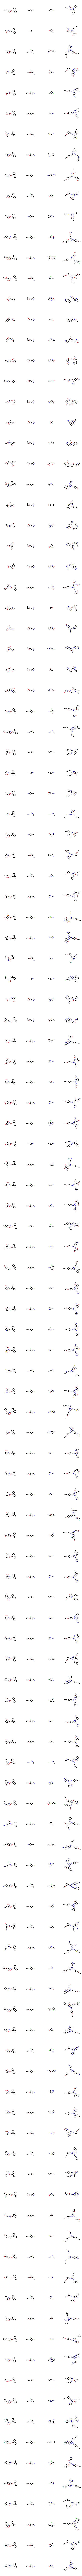

In [39]:
# Draw the buildingblock1_smiles, buildingblock2_smiles, buildingblock3_smiles and molecule_smiles columns

# Draw rows with step 3
rows = unique_buildingblock1.iloc[:1000]
# rows = rows[::3]

# Draw the rows in a grid
grid = []
for i, row in rows.iterrows():
    grid.append([Chem.MolFromSmiles(row["buildingblock1_smiles"]),
                                           Chem.MolFromSmiles(row["buildingblock2_smiles"]),
                                           Chem.MolFromSmiles(row["buildingblock3_smiles"]),
                                           Chem.MolFromSmiles(row["molecule_smiles"])])

# Draw the molecules in a grid
img = Chem.Draw.MolsToGridImage([mol for row in grid for mol in row], molsPerRow=4, maxMols=500, subImgSize=(200, 200))
img